# Regression and Clustering Based Project
**Input Data :- Input data is Continous data that is why it is regression**

**Output Data :- It is not given that is why it is clustering(Unlabelled data)**

# Step 1:- Business Problem

The dataset contains 36733 instances of 11 sensor measures aggregated over one hour (by means of average or sum) from a gas turbine located in Turkey's north western region for the purpose of studying flue gas emissions, namely CO and NOx (NO + NO2). The data comes from the same power plant used for predicting hourly net energy yield. By contrast, this data is collected in another data range (01.01.2011 - 31.12.2015), includes gas turbine parameters (such as Turbine Inlet Temperature and Compressor Discharge pressure) in addition to the ambient variables. Note that the dates are not given in the instances but the data are sorted in chronological order. See the attribute information and relevant paper for details. 
**Kindly follow the protocol mentioned in the paper (using the first three years' data for training/ cross-validation and the last two for testing) for reproducibility and comparability of works. The dataset can be well used for predicting turbine energy yield (TEY) using ambient variables as features.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df1 = pd.read_csv("gt_2011.csv")
df1.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83,134.67,11.898,0.32663,81.952
1,4.2932,1018.3,84.235,3.5709,23.951,1086.1,550.05,134.67,11.892,0.44784,82.377
2,3.9045,1018.4,84.858,3.5828,23.990,1086.5,550.19,135.10,12.042,0.45144,83.776
3,3.7436,1018.3,85.434,3.5808,23.911,1086.5,550.17,135.03,11.990,0.23107,82.505
4,3.7516,1017.8,85.182,3.5781,23.917,1085.9,550.00,134.67,11.910,0.26747,82.028


In [3]:
df1.shape

(7411, 11)

In [4]:
df2 = pd.read_csv("gt_2012.csv")
df2.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [5]:
df2.shape

(7628, 11)

In [6]:
df3 = pd.read_csv("gt_2013.csv")
df3.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,9.3779,1020.1,90.262,2.3927,19.166,1043.6,541.16,110.16,10.564,9.3472,98.741
1,9.2985,1019.9,89.934,2.3732,19.119,1039.9,538.94,109.23,10.572,11.0160,104.290
2,9.1337,1019.8,89.868,2.3854,19.178,1041.0,539.47,109.62,10.543,10.7500,103.470
3,8.9715,1019.3,89.490,2.3825,19.180,1037.1,536.89,108.88,10.458,12.2870,108.810
4,9.0157,1019.1,89.099,2.4044,19.206,1043.5,541.25,110.09,10.464,9.8229,100.020


In [7]:
df3.shape

(7152, 11)

# Step 2:- Data Understanding

**The explanations of sensor measurements and their brief statistics are given below.**

* Variable (Abbr.) Unit Min Max Mean
* Ambient temperature (AT) C â€“6.23 37.10 17.71
* Ambient pressure (AP) mbar 985.85 1036.56 1013.07
* Ambient humidity (AH) (%) 24.08 100.20 77.87
* Air filter difference pressure (AFDP) mbar 2.09 7.61 3.93
* Gas turbine exhaust pressure (GTEP) mbar 17.70 40.72 25.56
* Turbine inlet temperature (TIT) C 1000.85 1100.89 1081.43
* Turbine after temperature (TAT) C 511.04 550.61 546.16
* Compressor discharge pressure (CDP) mbar 9.85 15.16 12.06
* Turbine energy yield (TEY) MWH 100.02 179.50 133.51
* Carbon monoxide (CO) mg/m3 0.00 44.10 2.37
* Nitrogen oxides (NOx) mg/m3 25.90 119.91 65.29

In [8]:
df = pd.concat([df1, df2, df3], axis =0 )
df.head(10)

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83,134.67,11.898,0.32663,81.952
1,4.2932,1018.3,84.235,3.5709,23.951,1086.1,550.05,134.67,11.892,0.44784,82.377
2,3.9045,1018.4,84.858,3.5828,23.990,1086.5,550.19,135.10,12.042,0.45144,83.776
3,3.7436,1018.3,85.434,3.5808,23.911,1086.5,550.17,135.03,11.990,0.23107,82.505
4,3.7516,1017.8,85.182,3.5781,23.917,1085.9,550.00,134.67,11.910,0.26747,82.028
5,3.8858,1017.7,83.946,3.5824,23.903,1086.0,549.98,134.67,11.868,0.23473,81.748
6,3.6697,1018.0,84.114,3.5804,23.889,1085.9,550.04,134.68,11.877,0.44412,84.592
7,3.5892,1018.2,83.867,3.5777,23.876,1086.0,549.88,134.66,11.893,0.79996,84.193
8,3.7108,1018.5,84.948,3.6027,23.957,1086.3,549.98,134.65,11.870,0.68996,83.978
9,4.8281,1018.5,85.346,3.5158,23.422,1083.1,549.80,132.67,11.694,1.02810,82.654


In [9]:
df.shape

(22191, 11)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22191 entries, 0 to 7151
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      22191 non-null  float64
 1   AP      22191 non-null  float64
 2   AH      22191 non-null  float64
 3   AFDP    22191 non-null  float64
 4   GTEP    22191 non-null  float64
 5   TIT     22191 non-null  float64
 6   TAT     22191 non-null  float64
 7   TEY     22191 non-null  float64
 8   CDP     22191 non-null  float64
 9   CO      22191 non-null  float64
 10  NOX     22191 non-null  float64
dtypes: float64(11)
memory usage: 2.0 MB


In [11]:
X = df
# y = nothing as it is unlabelled data

# Applying Standardization

# Applying PCA

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Select features (excluding CO, NOX, TEY if you want to focus on inputs)
features = ["AT", "AP", "AH", "AFDP", "GTEP", "TIT", "TAT", "CDP"]  # optional: exclude TEY, CO, NOX

# 2. Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])

# 3. Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 4. Add PCA components and cluster labels to dataframe
df["PCA1"] = X_pca[:, 0]
df["PCA2"] = X_pca[:, 1]

# 5. Scatter plot
#sns.scatterplot(x="PCA1", y="PCA2", hue="Cluster", data=df, palette="tab10")
#plt.title("Clusters Visualized in 2D using PCA")
#plt.show()

# K-Means Clustering
**Find the optimal number of clusters : Elbow Curve**

[128644.19212317964, 71016.82568609249, 38805.90024934972, 26824.28227488137, 21497.098203069243, 18100.880571777696, 14576.026076739434, 12734.293407088055, 11642.427434088739, 10166.533931809092]


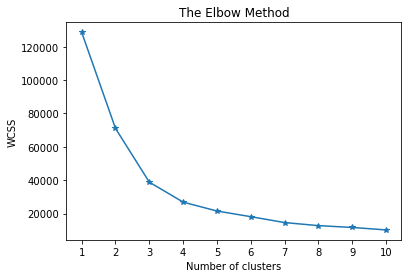

In [13]:
wcss = []

for k in range(1,11):
    from sklearn.cluster import KMeans
    kmeans = KMeans(n_clusters = k, init = 'k-means++')
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)
    
print(wcss)

# Using the elbow method
plt.plot(range(1,11),wcss,marker="*")
plt.xticks(range(1,11))
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [14]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = True)

X["km_cluster"] = kmeans.fit_predict(X_pca)

In [15]:
X

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX,PCA1,PCA2,km_cluster
0,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83,134.67,11.898,0.32663,81.952,-0.485751,-1.596829,3
1,4.2932,1018.3,84.235,3.5709,23.951,1086.1,550.05,134.67,11.892,0.44784,82.377,-0.517808,-1.616180,3
2,3.9045,1018.4,84.858,3.5828,23.990,1086.5,550.19,135.10,12.042,0.45144,83.776,-0.440529,-1.676760,3
3,3.7436,1018.3,85.434,3.5808,23.911,1086.5,550.17,135.03,11.990,0.23107,82.505,-0.479114,-1.707370,3
4,3.7516,1017.8,85.182,3.5781,23.917,1085.9,550.00,134.67,11.910,0.26747,82.028,-0.527788,-1.676880,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7147,4.8631,1027.0,81.084,4.2825,34.045,1100.0,529.98,168.38,14.290,1.25380,78.397,3.570858,-2.534915,4
7148,4.5173,1027.4,80.813,4.2481,33.904,1100.1,530.47,168.07,14.344,1.08080,78.251,3.550148,-2.567963,4
7149,4.2717,1027.9,80.380,4.2817,34.165,1099.9,529.56,168.55,14.395,1.04720,77.269,3.671276,-2.633645,4
7150,4.0853,1028.6,78.907,4.2313,33.802,1100.1,530.61,167.98,14.343,1.08750,77.985,3.560342,-2.600426,4


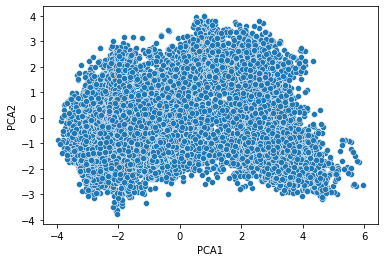

In [16]:
sns.scatterplot(x="PCA1",y="PCA2",data=X)
plt.show()

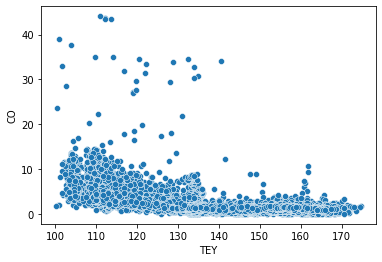

In [17]:
sns.scatterplot(x="TEY",y="CO",data=X)
plt.show()

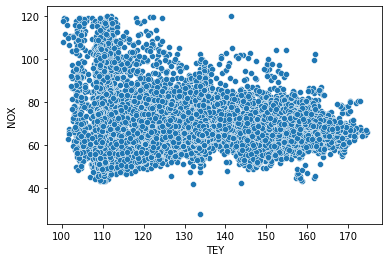

In [18]:
sns.scatterplot(x="TEY",y="NOX",data=X)
plt.show()

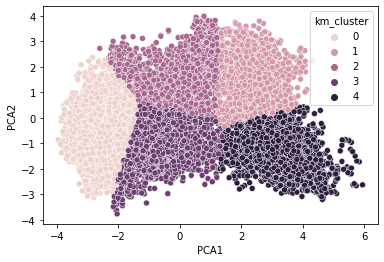

In [19]:
sns.scatterplot(x="PCA1",y="PCA2",hue="km_cluster",data=X)
plt.show()

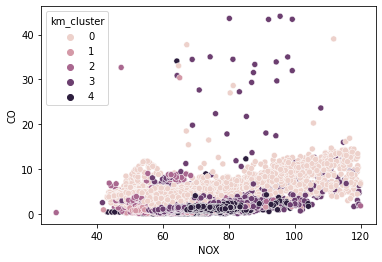

In [20]:
sns.scatterplot(x="NOX",y="CO",hue="km_cluster",data=X)
plt.show()

In [21]:
cluster_summary = X.groupby("km_cluster")[["AT", "TIT", "TEY", "CO", "NOX"]].mean()
print(cluster_summary)

                   AT          TIT         TEY        CO        NOX
km_cluster                                                         
0           17.502239  1055.751101  111.154730  4.784276  68.814398
1           24.884739  1099.674378  149.220136  1.035787  63.255245
2           24.866292  1089.158011  132.175383  1.564159  65.097164
3           12.405260  1084.184338  133.005306  1.900240  74.309176
4           11.421216  1099.708947  159.638574  0.967855  68.038152


**Which cluster has high CO/NOX → high emissions**

**Which has high TEY → high power output**

**Which has low TIT or AT → cooler operating conditions, etc.**

**➤ Describe each cluster like this:**
Cluster	Description
* Cluster 0	High TEY, low emissions → efficient operation
* Cluster 1	Low TEY, high CO → inefficient or faulty
* Cluster 2	Moderate TEY, moderate emissions
* Cluster 3	Low TIT, low output → idle or low load
* Cluster 4	High NOX, high TIT → overworked or high-temp regime

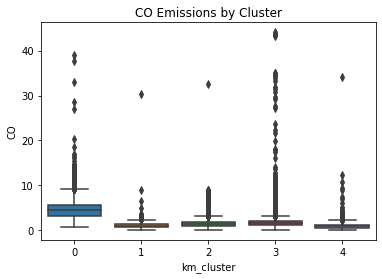

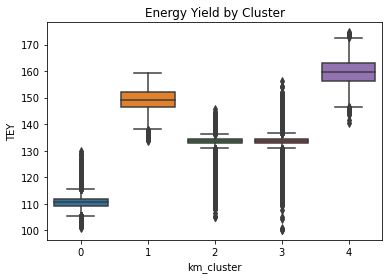

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x="km_cluster", y="CO", data=X)
plt.title("CO Emissions by Cluster")
plt.show()

sns.boxplot(x="km_cluster", y="TEY", data=X)
plt.title("Energy Yield by Cluster")
plt.show()

| Cluster   | Ambient Temp (AT) | Turbine Inlet Temp (TIT) | Turbine Energy Yield (TEY) | CO Emissions | NOx Emissions | Interpretation                          |
|-----------|-------------------|---------------------------|-----------------------------|--------------|----------------|------------------------------------------|
| Cluster 0 | ≈ Average         | 🔽 Low                    | 🔻 Low                      | 🔺 High      | ➕ Moderate     | Inefficient, high CO emissions           |
| Cluster 1 | 🔺 High           | 🔺 High                   | 🔺 High                     | 🔽 Low       | 🔽 Lowest       | Optimal & clean operation                |
| Cluster 2 | 🔺 High           | ➕ Slightly High          | ≈ Average                   | 🔽 Low       | ≈ Average       | Stable, balanced operation               |
| Cluster 3 | 🔽 Low            | ≈ Average                | ≈ Average                   | ➕ Slightly High | 🔺 Highest    | Efficient but NOx-heavy                  |
| Cluster 4 | ❄️ Lowest         | 🔺 Highest                | ⭐️ Highest                 | ✅ Lowest    | ➕ Moderate     | Maximum performance                      |

**🔵 Cluster 0 Description**

Low performance, high emissions

AT (17.5°C): Around average

TIT (1055.75°C): Much lower than average (suggests lower heat input)

TEY (111.15 MWh): 🔻 Much below average → low output

CO (4.78): 🔺 Much higher than mean → inefficient combustion

NOx (68.81): Slightly above average

**📝 Conclusion:**

This cluster indicates inefficient or degraded turbine operation: low inlet temperature, very low energy yield, and high CO emissions. Could point to partial load, poor fuel-air mixing, or maintenance issues.

**🟢 Cluster 1 Description**

Efficient operating mode in warmer conditions

AT (24.88°C): 🔺 Warmer than average

TIT (1099.67°C): 🔺 Very high

TEY (149.22 MWh): 🔺 Above average

CO (1.03): 🔽 Below average → clean combustion

NOx (63.25): 🔽 Lowest among all clusters

**📝 Conclusion:**

Represents efficient turbine operation in warm ambient conditions. High TIT and TEY with very low emissions — likely a stable full-load or near-optimal mode.

**🟡 Cluster 2 Description**

Moderate performance, balanced emissions

AT (24.86°C): 🔺 High

TIT (1089.15°C): Slightly above average

TEY (132.17 MWh): ≈ Average

CO (1.56): 🔽 Lower than average

NOx (65.10): ≈ Average

**📝 Conclusion:**

A balanced and typical operating cluster under warm conditions. Not as efficient as Cluster 1, but cleaner and more consistent than others. Could represent safe default operations.

**🟣 Cluster 3 Description**

Efficient output, but NOx-heavy

AT (12.40°C): 🔽 Cooler than average

TIT (1084.18°C): ≈ Average

TEY (133.00 MWh): ≈ Average

CO (1.90): Slightly above average

NOx (74.31): 🔺 Highest among all

**📝 Conclusion:**

This cluster shows moderate energy efficiency, but very high NOx due to cold ambient air possibly leading to hotter flames and NOx formation. May need emission control in cold environments.

**🔴 Cluster 4 Description**

Top performance, low CO emissions

AT (11.42°C): ❄️ Lowest ambient temp

TIT (1099.71°C): 🔺 Highest

TEY (159.64 MWh): ⭐️ Highest yield

CO (0.96): ✅ Lowest

NOx (68.04): Slightly above average

**📝 Conclusion:**

Represents the most productive and efficient operation despite low external temperatures. Combustion is clean (very low CO) and turbine yield is maximized. Ideal for output-focused performance.

In [23]:
from joblib import dump
dump(kmeans,"Gas_Turbine.joblib")

['Gas_Turbine.joblib']

# Step 4:- Predicting using Test Data

In [24]:
# Step 1: Import required libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler  # only if you used it
# import your model if needed (e.g., LogisticRegression, RandomForest, etc.)

# Step 2: Load test CSV data
test_df1 = pd.read_csv("gt_2014.csv")  # Replace with your actual file name
test_df1.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,8.8358,1022.2,98.762,3.2422,23.152,1067.5,549.94,126.16,11.381,1.9157,68.292
1,9.0529,1021.8,97.464,3.2074,23.207,1067.9,549.80,126.51,11.476,2.0596,68.610
2,9.2464,1021.3,96.494,3.2051,23.296,1068.5,549.89,126.96,11.555,2.1621,68.324
3,9.3792,1020.9,95.912,3.2159,23.465,1069.6,549.94,127.83,11.539,2.1214,67.619
4,9.5757,1020.8,95.412,3.1898,23.205,1068.1,549.83,126.56,11.484,2.1549,66.499


In [25]:
test_df2 = pd.read_csv("gt_2015.csv")  # Replace with your actual file name
test_df2.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,1.95320,1020.1,84.985,2.5304,20.116,1048.7,544.92,116.27,10.799,7.4491,113.250
1,1.21910,1020.1,87.523,2.3937,18.584,1045.5,548.50,109.18,10.347,6.4684,112.020
2,0.94915,1022.2,78.335,2.7789,22.264,1068.8,549.95,125.88,11.256,3.6335,88.147
3,1.00750,1021.7,76.942,2.8170,23.358,1075.2,549.63,132.21,11.702,3.1972,87.078
4,1.28580,1021.6,76.732,2.8377,23.483,1076.2,549.68,133.58,11.737,2.3833,82.515


In [26]:
test_df = pd.concat([test_df1, test_df2], axis =0 )
test_df.head(10)

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,8.8358,1022.2,98.762,3.2422,23.152,1067.5,549.94,126.16,11.381,1.9157,68.292
1,9.0529,1021.8,97.464,3.2074,23.207,1067.9,549.80,126.51,11.476,2.0596,68.610
2,9.2464,1021.3,96.494,3.2051,23.296,1068.5,549.89,126.96,11.555,2.1621,68.324
3,9.3792,1020.9,95.912,3.2159,23.465,1069.6,549.94,127.83,11.539,2.1214,67.619
4,9.5757,1020.8,95.412,3.1898,23.205,1068.1,549.83,126.56,11.484,2.1549,66.499
5,9.6661,1021.1,94.676,3.1782,23.403,1069.2,549.77,128.32,11.458,2.1566,67.005
6,9.6184,1021.2,94.407,3.1300,23.129,1067.4,549.88,127.21,11.316,1.5995,66.593
7,9.3555,1021.3,95.311,3.1190,23.000,1066.6,549.93,126.51,11.372,1.9358,67.891
8,9.1803,1021.2,95.898,3.1430,23.188,1067.5,550.01,127.32,11.328,1.8884,68.946
9,9.2486,1021.1,96.156,3.1075,23.042,1066.6,550.05,126.53,11.316,1.7925,68.853


In [27]:
# Replace with the actual feature columns you used in training
features= ["AT", "AP", "AH", "AFDP", "GTEP", "TIT", "TAT", "CDP"]

# 2. Scale the features
#scaler = StandardScaler()
X_test = scaler.transform(test_df[features])

# 3. Perform PCA
#pca = PCA(n_components=2)
Xt_pca = pca.transform(X_test)

test_clusters = kmeans.predict(Xt_pca)

In [30]:
# Add predictions to the test_df
test_df["Prediction"] = test_clusters

print(test_df.head())

       AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY     CDP  \
0  8.8358  1022.2  98.762  3.2422  23.152  1067.5  549.94  126.16  11.381   
1  9.0529  1021.8  97.464  3.2074  23.207  1067.9  549.80  126.51  11.476   
2  9.2464  1021.3  96.494  3.2051  23.296  1068.5  549.89  126.96  11.555   
3  9.3792  1020.9  95.912  3.2159  23.465  1069.6  549.94  127.83  11.539   
4  9.5757  1020.8  95.412  3.1898  23.205  1068.1  549.83  126.56  11.484   

       CO     NOX  Prediction  
0  1.9157  68.292           3  
1  2.0596  68.610           3  
2  2.1621  68.324           3  
3  2.1214  67.619           3  
4  2.1549  66.499           3  


In [32]:
# Add cluster labels to your test data
test_df["Cluster"] = test_df["Prediction"]

# Group by cluster and summarize statistics
cluster_summary = test_df.groupby("Cluster").agg({
    "AT": ["mean", "min", "max"],
    "AP": ["mean", "min", "max"],
    "AH": ["mean", "min", "max"],
    "AFDP": ["mean", "min", "max"],
    "GTEP": ["mean", "min", "max"],
    "TIT": ["mean", "min", "max"],
    "TAT": ["mean", "min", "max"],
    "CDP": ["mean", "min", "max"],
    "TEY": ["mean", "min", "max"],
    "CO": ["mean", "min", "max"],
    "NOX": ["mean", "min", "max"]
}).round(2)

# Flatten multi-index column names
cluster_summary.columns = ['_'.join(col) for col in cluster_summary.columns]
cluster_summary.reset_index(inplace=True)

# Display the summary
print(cluster_summary)

   Cluster  AT_mean  AT_min  AT_max  AP_mean   AP_min  AP_max  AH_mean  \
0        0    14.39   -1.40   31.64  1014.17   990.17  1033.5    80.14   
1        1    25.03   10.08   37.10  1010.44   996.68  1024.6    66.85   
2        2    23.60    8.58   35.41  1010.37   989.40  1025.6    66.17   
3        3    13.38   -5.98   26.44  1015.31   995.22  1035.7    83.26   
4        4     9.81   -6.23   22.18  1019.85  1000.90  1036.6    77.26   

   AH_min  AH_max  ...  CDP_max  TEY_mean  TEY_min  TEY_max  CO_mean  CO_min  \
0   29.55  100.10  ...    11.69    113.06   100.02   131.42     4.98    0.01   
1   24.08  100.00  ...    14.17    148.96   138.70   159.83     1.54    0.04   
2   25.99   98.68  ...    13.08    131.57   106.71   149.25     1.98    0.04   
3   37.01  100.10  ...    13.21    131.67   107.18   155.48     2.29    0.00   
4   35.23  100.09  ...    15.16    160.27   144.06   179.50     1.91    0.01   

   CO_max  NOX_mean  NOX_min  NOX_max  
0   41.10     66.35    38.01   119